In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import missingno as miss

Before starting we import various interesting different libraries, which we will use later.

In [4]:
import seaborn as sns
sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()

In [5]:
pd.set_option('display.max_columns', None)

Now we read our initial file from the dataset.

In [136]:
df = pd.read_csv('DatabaseBigData.csv')

In [137]:
df

,Unnamed: 0,IMPACT,Likelihood To Recommend,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan.1,Feb.1,Mar.1,Apr.1,May.1,Jun.1,Jul.1,Aug.1,Sep.1,Oct.1,Nov.1,Dec.1,Jan.2,Feb.2,Mar.2,Apr.2,May.2,Jun.2,Jul.2,Aug.2,Sep.2,Oct.2,Nov.2,Dec.2,Jan.3,Feb.3,Mar.3,Apr.3,May.3,Jun.3,Jul.3,Aug.3,Sep.3,Oct.3,Nov.3,Overall
0,Sample Size,32976,32976,17,17,367,552,307,361,496,337,431,587,981,739,884,716,715,920,894,849,680,913,495,768,579,370,771,573,737,369,490,920,623,313,481,1475,909,547,674,806,1099,988,1042,1148,1118,586,872,1030,1451,32997.000000
1,Overall Satisfaction,0.070595052,0.070550124,-,-,-,-,-,-,-,6.2,6.25,5.84375,6.210526316,5.96969697,5.863636364,7.565217391,6.359375,6.110091743,6.202380952,6.596330275,6.420289855,6.617021277,6.556521739,6.314814815,6.435185185,6.20754717,7.087719298,6.104477612,6.539823009,6.451851852,6.825,7.344155844,6.838095238,6.881355932,6.947368421,7.274074074,7.159292035,6.881355932,6.829787234,7.344444444,6.885416667,7.131578947,7.193877551,6.72,7.424778761,7.488095238,7.552380952,7.489583333,6.69,6.787911
2,Understandability of Information,0.036293045,0.036269947,-,-,-,-,-,-,-,7.409090909,7.421052632,7.441176471,7.85,7.857142857,7.173913043,8.043478261,6.876712329,7.675,7.366666667,7.677966102,7.506944444,7.62987013,7.889830508,7.789915966,7.783783784,7.631578947,7.896551724,7.395683453,7.652173913,7.525547445,7.938223938,8.130434783,7.525862069,7.837209302,7.947368421,8.273381295,7.865546218,8.01754386,7.989247312,8.139784946,8,8.048,8.105769231,7.857142857,7.957627119,8.505617978,8.182608696,8.019230769,7.623853211,7.818733
3,Claims handling satisfaction,0.036210869,0.036187823,-,-,-,-,-,-,-,7.047619048,6.861111111,6.058823529,7.368421053,7.212121212,6.4,8.210526316,6.954545455,7.112068966,6.894117647,6.878504673,6.783216783,7.065359477,7.191304348,7.035087719,7.38317757,7.125,7.844827586,6.947761194,6.869565217,7.177777778,7.421875,7.59602649,7.372881356,7.441860465,7.513157895,7.692857143,7.406779661,7.689655172,7.885416667,7.489361702,7.353535354,7.786885246,7.298076923,7.117647059,7.767857143,7.582417582,7.904347826,7.81372549,7.23364486,7.325077
4,Support and assistance satisfaction,0.036109393,0.036086412,-,-,-,-,-,-,-,7,6.810810811,6.6875,7.842105263,6.942857143,6.347826087,7.416666667,7.097222222,6.907563025,7.147727273,7.517241379,7.208633094,7.238410596,7.182608696,7.6875,7.467889908,7.50877193,7.654545455,7.145985401,7.376146789,7.481203008,7.793522267,7.967948718,7.135135135,7.752066116,7.527027027,8.147058824,7.811965812,7.894736842,7.666666667,7.880434783,7.90625,7.743801653,7.797979798,7.602040816,7.910714286,7.988888889,8.212389381,7.909090909,7.009708738,7.556395
5,Speed of Requests,0.034805942,0.034783791,-,-,-,-,-,-,-,7.5,6.789473684,7.424242424,7.85,7.828571429,6.761904762,7.782608696,7.277777778,7.625,7.285714286,7.7,7.361111111,7.5,7.898305085,7.56779661,7.63963964,7.586206897,8.017241379,7.350364964,7.456896552,7.551470588,8.007692308,8.11875,7.610169492,7.983870968,7.756756757,8.071428571,7.842975207,7.827586207,7.861702128,8.094736842,7.99009901,8.098360656,8.048543689,7.673076923,8.198275862,8.142857143,8.00877193,7.826923077,7.3,7.755561
6,Expertise and Competence,0.034675719,0.03465365,-,-,-,-,-,-,-,6.80952381,7.457142857,6.333333333,7.842105263,8,7.545454545,8.409090909,7.291666667,7.791666667,7.494382022,7.871794872,7.4375,7.509677419,7.915254237,7.618644068,7.712962963,7.431034483,8.070175439,7.550724638,7.681034483,7.496296296,7.907335907,8.05625,7.722689076,7.873015873,7.933333333,8.163120567,7.892561983,8.157894737,8.14893617,8.084210526,8.158415842,7.96,8.153846154,7.819047619,8.310344828,8.24137931,8.157894737,7.990196078,7.863636364,7.837900
7,Keeping promises,0.033096224,0.033075161,-,-,-,-,-,-,-,6.666666667,7.714285714,7.0625,7.842105263,7.742857143,7.571428571,8.095238095,7.422535211,7.836206897,7.597701149,7.436363636,7.441176471,7.728476821,8.026086957,7.781818182,7.723809524,7.618181818,8.236363636,7.466165414,7.473214286,7.684210526,8.035573123,8.12987013,

In [138]:
df.head(50)

,Unnamed: 0,IMPACT,Likelihood To Recommend,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan.1,Feb.1,Mar.1,Apr.1,May.1,Jun.1,Jul.1,Aug.1,Sep.1,Oct.1,Nov.1,Dec.1,Jan.2,Feb.2,Mar.2,Apr.2,May.2,Jun.2,Jul.2,Aug.2,Sep.2,Oct.2,Nov.2,Dec.2,Jan.3,Feb.3,Mar.3,Apr.3,May.3,Jun.3,Jul.3,Aug.3,Sep.3,Oct.3,Nov.3,Overall
0,Sample Size,32976,32976,17,17,367,552,307,361,496,337,431,587,981,739,884,716,715,920,894,849,680,913,495,768,579,370,771,573,737,369,490,920,623,313,481,1475,909,547,674,806,1099,988,1042,1148,1118,586,872,1030,1451,32997.000000
1,Overall Satisfaction,0.070595052,0.070550124,-,-,-,-,-,-,-,6.2,6.25,5.84375,6.210526316,5.96969697,5.863636364,7.565217391,6.359375,6.110091743,6.202380952,6.596330275,6.420289855,6.617021277,6.556521739,6.314814815,6.435185185,6.20754717,7.087719298,6.104477612,6.539823009,6.451851852,6.825,7.344155844,6.838095238,6.881355932,6.947368421,7.274074074,7.159292035,6.881355932,6.829787234,7.344444444,6.885416667,7.131578947,7.193877551,6.72,7.424778761,7.488095238,7.552380952,7.489583333,6.69,6.787911
2,Understandability of Information,0.036293045,0.036269947,-,-,-,-,-,-,-,7.409090909,7.421052632,7.441176471,7.85,7.857142857,7.173913043,8.043478261,6.876712329,7.675,7.366666667,7.677966102,7.506944444,7.62987013,7.889830508,7.789915966,7.783783784,7.631578947,7.896551724,7.395683453,7.652173913,7.525547445,7.938223938,8.130434783,7.525862069,7.837209302,7.947368421,8.273381295,7.865546218,8.01754386,7.989247312,8.139784946,8,8.048,8.105769231,7.857142857,7.957627119,8.505617978,8.182608696,8.019230769,7.623853211,7.818733
3,Claims handling satisfaction,0.036210869,0.036187823,-,-,-,-,-,-,-,7.047619048,6.861111111,6.058823529,7.368421053,7.212121212,6.4,8.210526316,6.954545455,7.112068966,6.894117647,6.878504673,6.783216783,7.065359477,7.191304348,7.035087719,7.38317757,7.125,7.844827586,6.947761194,6.869565217,7.177777778,7.421875,7.59602649,7.372881356,7.441860465,7.513157895,7.692857143,7.406779661,7.689655172,7.885416667,7.489361702,7.353535354,7.786885246,7.298076923,7.117647059,7.767857143,7.582417582,7.904347826,7.81372549,7.23364486,7.325077
4,Support and assistance satisfaction,0.036109393,0.036086412,-,-,-,-,-,-,-,7,6.810810811,6.6875,7.842105263,6.942857143,6.347826087,7.416666667,7.097222222,6.907563025,7.147727273,7.517241379,7.208633094,7.238410596,7.182608696,7.6875,7.467889908,7.50877193,7.654545455,7.145985401,7.376146789,7.481203008,7.793522267,7.967948718,7.135135135,7.752066116,7.527027027,8.147058824,7.811965812,7.894736842,7.666666667,7.880434783,7.90625,7.743801653,7.797979798,7.602040816,7.910714286,7.988888889,8.212389381,7.909090909,7.009708738,7.556395
5,Speed of Requests,0.034805942,0.034783791,-,-,-,-,-,-,-,7.5,6.789473684,7.424242424,7.85,7.828571429,6.761904762,7.782608696,7.277777778,7.625,7.285714286,7.7,7.361111111,7.5,7.898305085,7.56779661,7.63963964,7.586206897,8.017241379,7.350364964,7.456896552,7.551470588,8.007692308,8.11875,7.610169492,7.983870968,7.756756757,8.071428571,7.842975207,7.827586207,7.861702128,8.094736842,7.99009901,8.098360656,8.048543689,7.673076923,8.198275862,8.142857143,8.00877193,7.826923077,7.3,7.755561
6,Expertise and Competence,0.034675719,0.03465365,-,-,-,-,-,-,-,6.80952381,7.457142857,6.333333333,7.842105263,8,7.545454545,8.409090909,7.291666667,7.791666667,7.494382022,7.871794872,7.4375,7.509677419,7.915254237,7.618644068,7.712962963,7.431034483,8.070175439,7.550724638,7.681034483,7.496296296,7.907335907,8.05625,7.722689076,7.873015873,7.933333333,8.163120567,7.892561983,8.157894737,8.14893617,8.084210526,8.158415842,7.96,8.153846154,7.819047619,8.310344828,8.24137931,8.157894737,7.990196078,7.863636364,7.837900
7,Keeping promises,0.033096224,0.033075161,-,-,-,-,-,-,-,6.666666667,7.714285714,7.0625,7.842105263,7.742857143,7.571428571,8.095238095,7.422535211,7.836206897,7.597701149,7.436363636,7.441176471,7.728476821,8.026086957,7.781818182,7.723809524,7.618181818,8.236363636,7.466165414,7.473214286,7.684210526,8.035573123,8.12987013,

In [5]:
first_row = df['Unnamed: 0']

We scrape all of the names of the first column, in case we will need them later.

In [6]:
#first_row

# Missing Data

We no analyze the amount of missing data within the dataset, we will use in this case a dataset in which will delete all not directly survey-related has already been deleted.

The following matrix displays all the missing values that have been vacant in the dataset.

In [62]:
df2 = pd.read_csv('DriverAnalysisNT.csv')
del df2['Pain points']
del df2['Main category']
del df2['# Surveys']
del df2['Weight']
del df2['Overall']
del df2['Unnamed: 0']

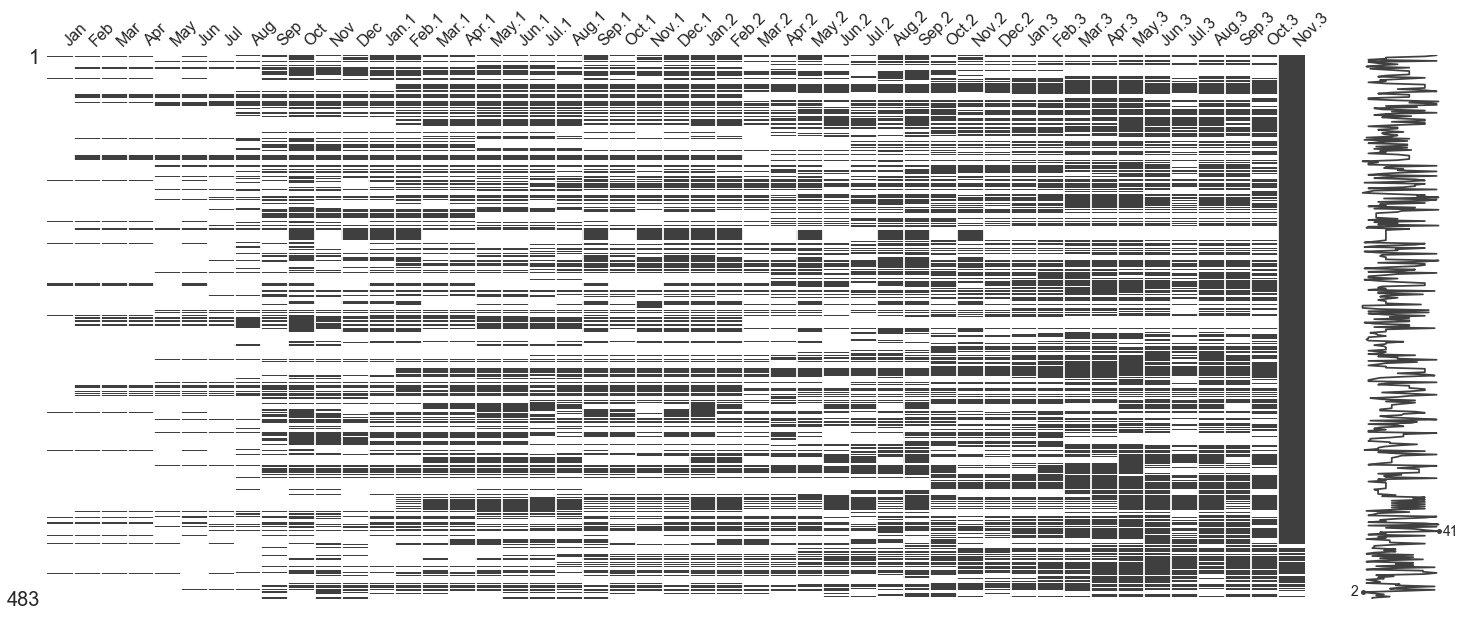

In [63]:
miss.matrix(df2)

# Data Preparation

We use now another transposed version of the dataset and scrape the names of the months time period.

In [7]:
dff = pd.read_csv('DriverAnalysisT.csv')
dff.head()

,Unnamed: 0,Overall Satisfaction,Ability to reach required service,Ability to reach to regional sales team,Ability to resolve my issues,Accessibility to right person (Life),Accessibility to right person (Non Life),Accident,Accidents,Accounting Centres,Activity of sales support experts,Additional coverage,Additional coverage sat,Administration efficiency of Relationship Managers,Administration efficiency of Sales Support Team,App Calculations,App Ease,App Support,App Support Presentation,Are you happy with the training opportunities that you receive from Generali?,Availability (Account Management),Availability of inspector,Availability of Partner Portal,Availability of your main contact,Availability of your main contact.1,Availability of your main contact.2,"Awareness of news, campaigns, innovations and changes",Branch - Availability,Branch - Manager,Branch - Ops Execs,Branch - Support,Branch assignment,Business Opportunity Presentation (BOP),Career opportunity,Claim Assistance,Claims,Claims - Clarity of process,Claims - Ease of contact,Claims - Time to receive payment,Claims (Car repair shop),Claims (Invoices),Claims Centre,Claims handling satisfaction,Claims liquidation,Claims Motor,Claims Non-Motor,Claims overall,Claims Satisfaction,Clarity around claims handling process,Clarity of procedures,Coding,Commercial Support of Europ Assistance contacts,Commision calculation,Commisions,Commission,Commission (Products),Commission process,Commissions table,Comms - Commission,Comms - Communications,Comms - Communications.1,Comms - Contest,Comms - Engagements,Comms - Engagements.1,Communication,Communications to customer,Communications to you,Compensation,Compensation.1,Competetiveness of offers by Generali,Competitively priced,Competitivenes of Profi,Competitiveness of offering,Competitor,Comprehensive Motor Insurance,Comprehensive Motor Insurance sat,Confirmation to the customer of the claim submision,Contact availability,Contact center,Contact center.1,Contact Knowledge,Contact Quality,Contact Satisfaction,Contact Speed,Content quality of attached materials,Contest Satisfaction,Contests / competitions / rewards,Contests / competitions / rewards.1,Contests / competitions / rewards.2,Contests and incentive programs,Coordinator - Frequency of visits,Coordinator - Help in problem solving,Coordinator - Info usefulness,Coordinator - Phone availability,Corporate SME,Counter service,Coverage,Coverage.1,Coverage (Life),Coverage (Non Life),Coverage and limits of Profi,Customer Call Center,Customer centricity of claim settlement,Customer segmentation,Customer support during claims,Customization of Generali products,Differentiated products,Direct information (Life),Direct information (Non Life),Ease of access of the system,Ease of contact with Claims Department,Ease of contacting,Ease of finding info,Ease of finding info.1,Ease of getting access,Ease of Selling,Ease of selling products,Ease of use of iConnect,Ease of use of tools,Ease of Use tools (Life),Ease of Use tools (Non Life),Ease of using the app,E-Services,E-Services.1,Europ Assistance products offer needs,Examination Training,Expertise (Claims),Expertise and Competence,Experts,Finance,Finding solutions (Broker),Flexibility,Flexibility (Broker),Frequency of contact,Frequency of contact.1,Frequency of contact.2,Frequency of contacts,Frequency of visits,Friendliness of Employees,Functionality of IBA,Funeral Insurance,General Partner Service Satisfaction,General Partner Services Availability,General Partner Services Expertise,General Partner Services Quallity,General Partner Services Speed,Genernet,Glass,Greeting and Listening,Group life insurance,Health,Health Insurance,Helpfulness,Home,Home insurance,Home insurance sat,Home-owners Commission Rates,Home-owners Product Knowledge,Home-owners Product Quality,How much our campaigns motivate you,How satisfied are you with our claims Services?,How satisfied are you with our Collection Services?,How satisfied are you with our Motor Underwriting

Now we scrape the names of the months within the time period.

In [8]:
first_row = dff['Unnamed: 0']

In [9]:
first_row

0       Pain points
1     Main category
2               Jan
3               Feb
4               Mar
5               Apr
6               May
7               Jun
8               Jul
9               Aug
10              Sep
11              Oct
12              Nov
13              Dec
14              Jan
15              Feb
16              Mar
17              Apr
18              May
19              Jun
20              Jul
21              Aug
22              Sep
23              Oct
24              Nov
25              Dec
26              Jan
27              Feb
28              Mar
29              Apr
30              May
31              Jun
32              Jul
33              Aug
34              Sep
35              Oct
36              Nov
37              Dec
38              Jan
39              Feb
40              Mar
41              Apr
42              May
43              Jun
44              Jul
45              Aug
46              Sep
47              Oct
48              Nov
49          Overall


Now we start analyzing the numerical values of the datset more thoroughly. We import a cleaned version of the dataset, in which our group specified the membership of every single driver to a pain point and a main category. We thus gathered two new categorical columns.
We further will analyze the effects that these and try to find useful pattern, which could help the company to understand clearer how to benefit from this information.

In [65]:
df2 = pd.read_csv('DriverAnalysisNT.csv')
df2.head()

,Unnamed: 0,Pain points,Main category,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan.1,Feb.1,Mar.1,Apr.1,May.1,Jun.1,Jul.1,Aug.1,Sep.1,Oct.1,Nov.1,Dec.1,Jan.2,Feb.2,Mar.2,Apr.2,May.2,Jun.2,Jul.2,Aug.2,Sep.2,Oct.2,Nov.2,Dec.2,Jan.3,Feb.3,Mar.3,Apr.3,May.3,Jun.3,Jul.3,Aug.3,Sep.3,Oct.3,Nov.3,Overall,# Surveys,Weight
0,Overall Satisfaction,Overall Satisfaction,Overall Satisfaction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2,6.250000,5.843750,6.210526,5.969697,5.863636,7.565217,6.359375,6.110092,6.202381,6.59633,6.42029,6.617021,6.556522,6.314815,6.435185,6.207547,7.087719,6.104478,6.539823,6.451852,6.825000,7.344156,6.838095,6.881356,6.947368,7.274074,7.159292,6.881356,6.829787,7.344444,6.885417,7.131579,7.193878,6.720000,7.424779,7.488095,7.552381,7.489583,6.681481,6.786698,164.255621,1114.753369
1,Ability to reach required service,Speed of resolution,Speed of Resolution/service support,5.214286,6.05,6.047619,6.142857,NaN,6.163265,NaN,NaN,5.350877,8.000000,NaN,NaN,5.516854,4.823529,5.287671,5.275362,NaN,NaN,NaN,NaN,5.346154,NaN,NaN,5.287500,4.428571,4.709677,4.060606,5.161290,5.450000,6.428571,NaN,6.181818,6.333333,5.042553,NaN,5.800000,5.464286,6.025641,6.236842,6.238095,6.909091,6.111111,4.090909,6.171429,6.588235,6.347826,5.587786,9.202174,154.227180,861.788514
2,Ability to reach to regional sales team,Speed of resolution,Speed of Resolution/service support,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.074627,NaN,9.236364,8.853659,9.098039,NaN,NaN,NaN,NaN,NaN,NaN,8.034483,NaN,9.760000,9.791667,9.666667,9.448276,NaN,NaN,9.489362,NaN,NaN,9.800000,9.600000,NaN,8.694444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.202174,8.775599,62.933153,579.121820
3,Ability to resolve my issues,Value proposition,Value proposition/products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.194030,NaN,8.909091,8.878049,8.788462,NaN,NaN,NaN,NaN,NaN,NaN,8.379310,NaN,9.280000,9.375000,9.333333,9.137931,NaN,NaN,8.891304,NaN,NaN,9.300000,8.700000,NaN,7.914286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.775599,5.179487,62.933153,552.276124
4,Accessibility to right person (Life),Speed of resolution,Speed of Resolution/service support,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.900000,3.555556,NaN,5.833333,6.800000,NaN,5.179487,6.686141,28.352367,146.850723


To get a better understanding of the complexity of the different survey values, we plot their overall general values. Our goal is to find patterns in the following graphs.
As we can see, our values are very complex and thus we are not able to detect any patterns from the data at first sight.

Populating the interactive namespace from numpy and matplotlib


Main category
Advisory & training                                         AxesSubplot(0.125,0.125;0.775x0.755)
Clarity of communication                                    AxesSubplot(0.125,0.125;0.775x0.755)
Commercial Support Tools/Marketing materials & campaigns    AxesSubplot(0.125,0.125;0.775x0.755)
Overall Satisfaction                                        AxesSubplot(0.125,0.125;0.775x0.755)
Relationship (field managers)                               AxesSubplot(0.125,0.125;0.775x0.755)
Speed of Resolution/service support                         AxesSubplot(0.125,0.125;0.775x0.755)
Value proposition/products                                  AxesSubplot(0.125,0.125;0.775x0.755)
Name: Overall, dtype: object

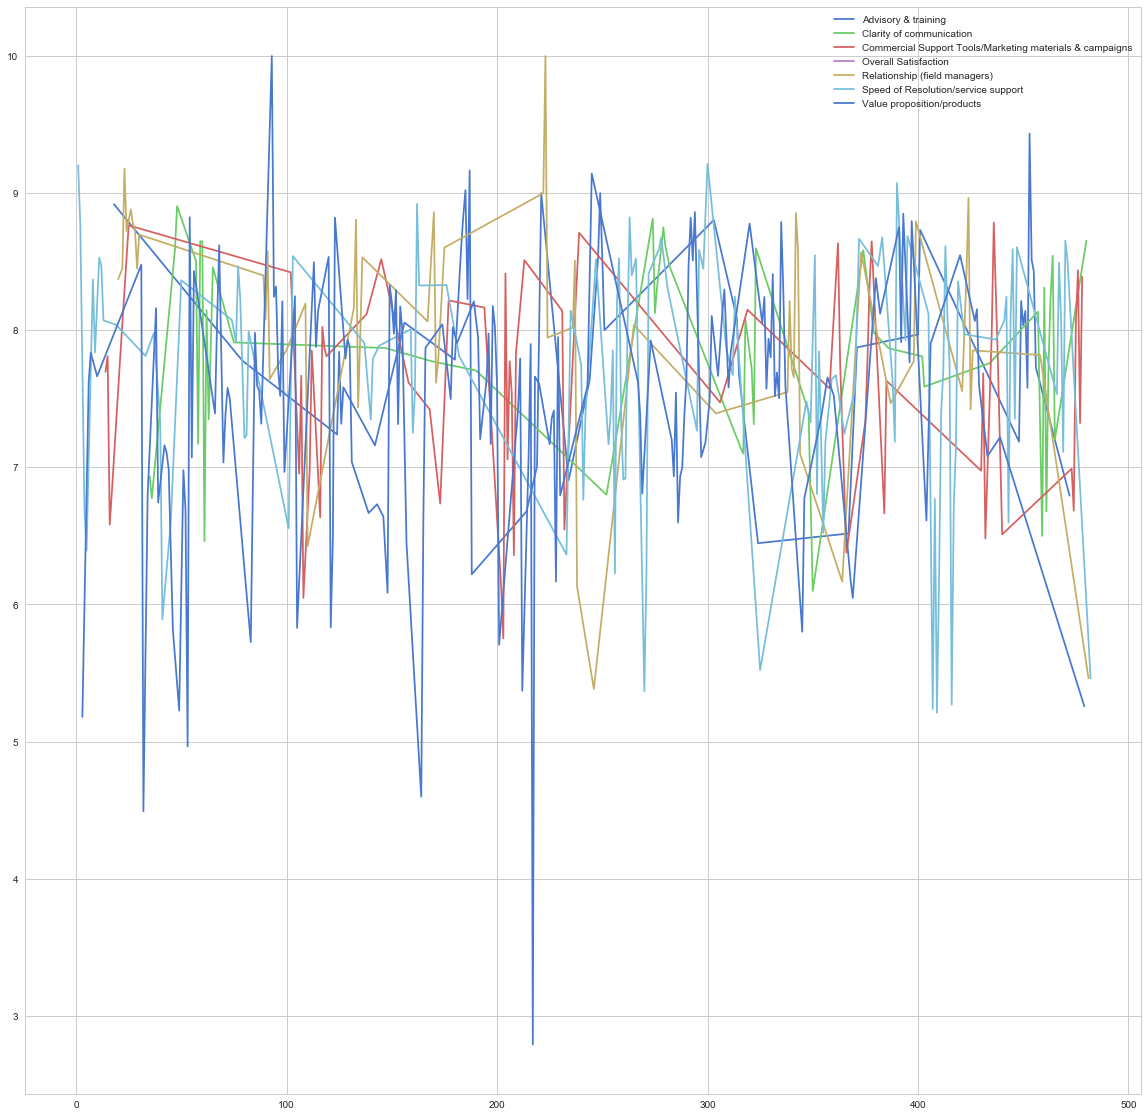

In [14]:
dfx = df2
%pylab inline
figsize(20,20)
dfx.groupby('Main category')['Overall'].plot(legend=True)

Populating the interactive namespace from numpy and matplotlib


Pain points
Advisory & training                AxesSubplot(0.125,0.125;0.775x0.755)
Clarity of communication           AxesSubplot(0.125,0.125;0.775x0.755)
Commercial Support Tools           AxesSubplot(0.125,0.125;0.775x0.755)
Marketing materials & campaigns    AxesSubplot(0.125,0.125;0.775x0.755)
Overall Satisfaction               AxesSubplot(0.125,0.125;0.775x0.755)
Products                           AxesSubplot(0.125,0.125;0.775x0.755)
Relationship (field managers)      AxesSubplot(0.125,0.125;0.775x0.755)
Service support                    AxesSubplot(0.125,0.125;0.775x0.755)
Speed of resolution                AxesSubplot(0.125,0.125;0.775x0.755)
Value proposition                  AxesSubplot(0.125,0.125;0.775x0.755)
Name: Overall, dtype: object

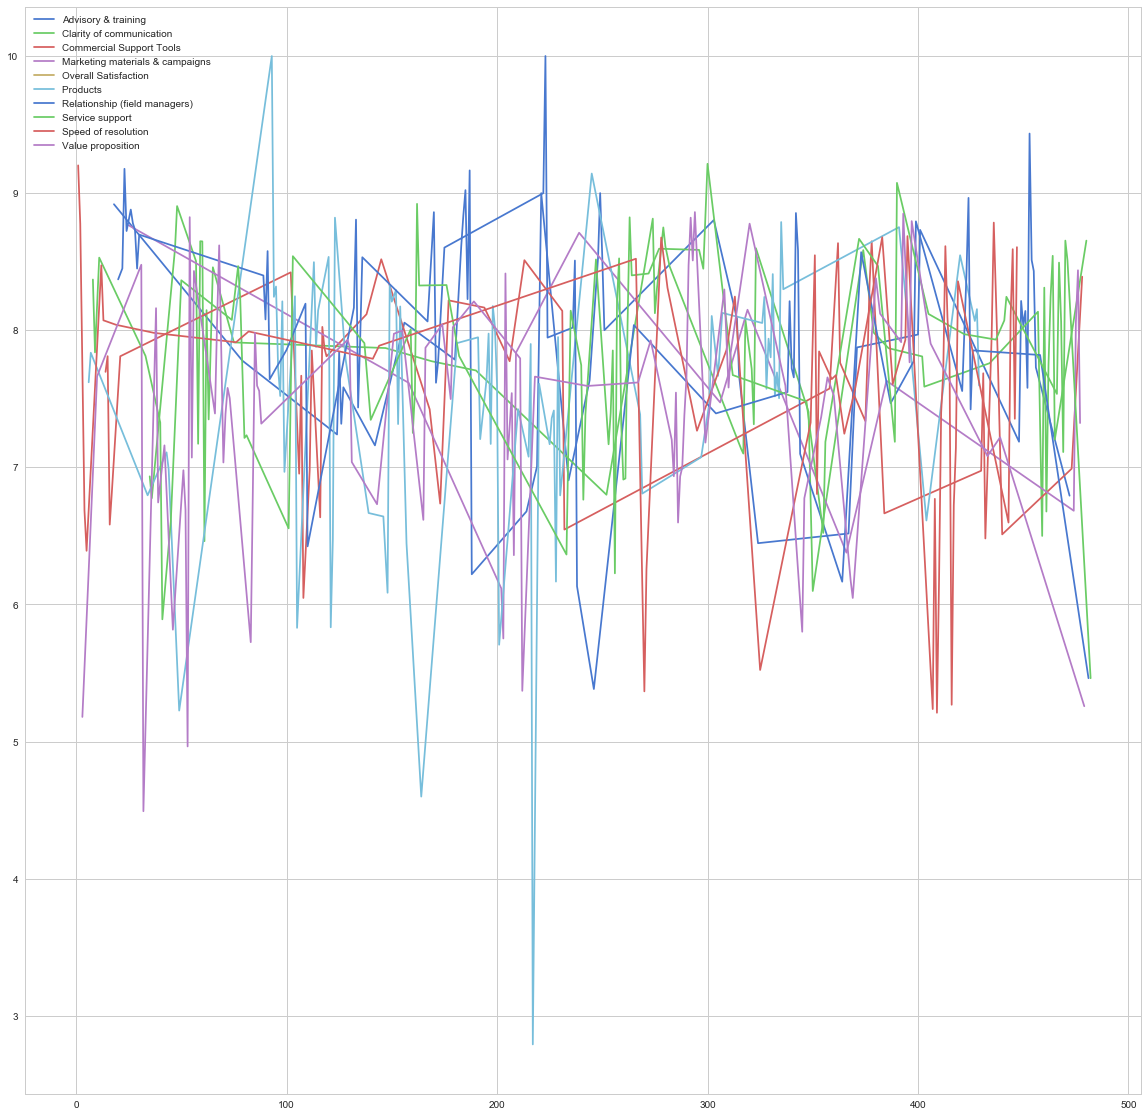

In [15]:
dfx = df2
%pylab inline
figsize(20,20)
dfx.groupby('Pain points')['Overall'].plot(legend=True)

As our general plot was not very successful in gathering us a lot information regarding the patterns of the data, we now turn our focus now to descriptive statistics. 

## Descriptive Statistics

We now are interested in determining the number of counts for every single pain point and main category.

As we can see in the graphs, the 'Overall Satisfaction'-category has in both cases only one value, as it consists of only a single driver, which averages the scores received over the relative period of time.

Populating the interactive namespace from numpy and matplotlib


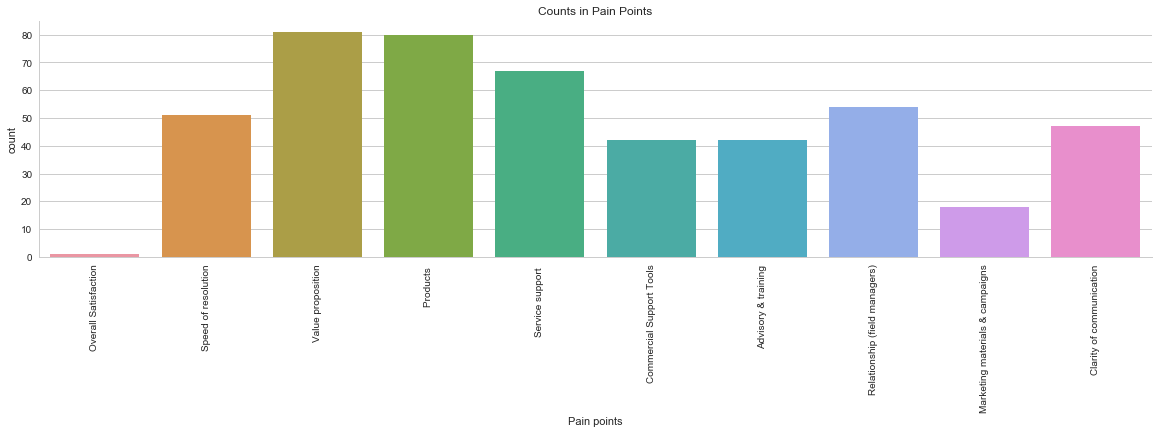

In [33]:
dfx = pd.read_csv('DriverAnalysisNT.csv')
%pylab inline
figsize(20,20)
g = sns.factorplot("Pain points", data=dfx, aspect=4, kind="count")
g.set_xticklabels(rotation=90)
g = plt.title("Counts in Pain Points")

Populating the interactive namespace from numpy and matplotlib


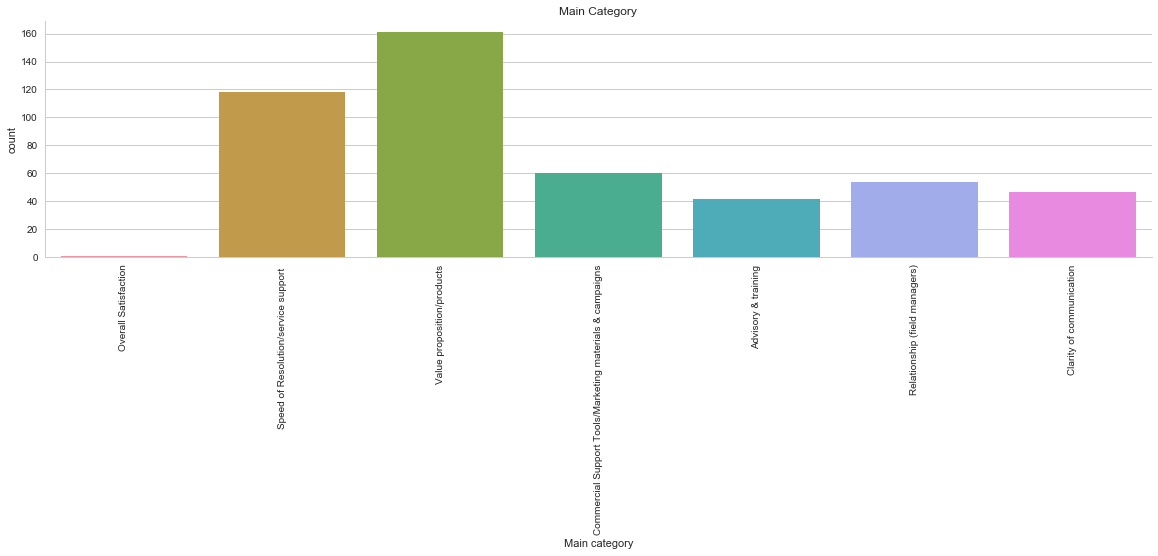

In [77]:
dfx = pd.read_csv('DriverAnalysisNT.csv')
%pylab inline
figsize(20,20)
g = sns.factorplot("Main category", data=dfx, aspect=4, kind="count")
g.set_xticklabels(rotation=90)
g = plt.title("Main Category")

In numerical terms:

In [42]:
chars = ['Pain points', 'Main category']
for i in chars:
    print(pd.value_counts(df_[i]))

Value proposition                  81
Products                           80
Service support                    67
Relationship (field managers)      54
Speed of resolution                51
Clarity of communication           47
Advisory & training                42
Commercial Support Tools           42
Marketing materials & campaigns    18
Overall Satisfaction                1
Name: Pain points, dtype: int64
Value proposition/products                                  161
Speed of Resolution/service support                         118
Commercial Support Tools/Marketing materials & campaigns     60
Relationship (field managers)                                54
Clarity of communication                                     47
Advisory & training                                          42
Overall Satisfaction                                          1
Name: Main category, dtype: int64


Now we inspect the mean and median values of our two categorical variables. Interestingly enough, the Overall Satisfaction variable scores in both cases the lowest, pointing towards a negative attitude of survey takers in regard to the score that they had given to the company, considering that every part of the company has scored higher than what is displayed in the Overall Satisfaction case. 

Populating the interactive namespace from numpy and matplotlib


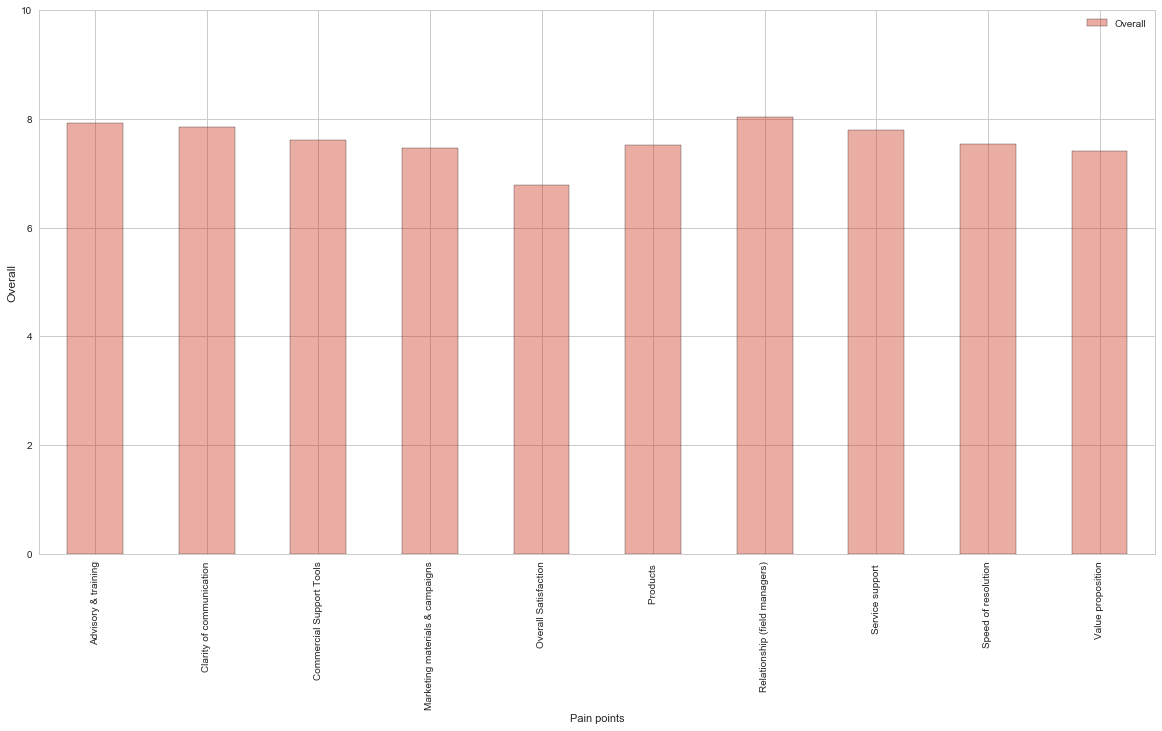

In [28]:
dfx = df2
dfx = dfx.groupby(['Pain points'])['Overall'].mean()
%pylab inline
figsize(20,10)
dfx.plot.bar(color=(0.8, 0.2, 0.1, 0.4),  edgecolor='black', legend=True)
plt.ylabel("Overall", size = 12)
ylim(0,10)
plt.savefig("PainpointsOverall.png", dpi=400)

Populating the interactive namespace from numpy and matplotlib


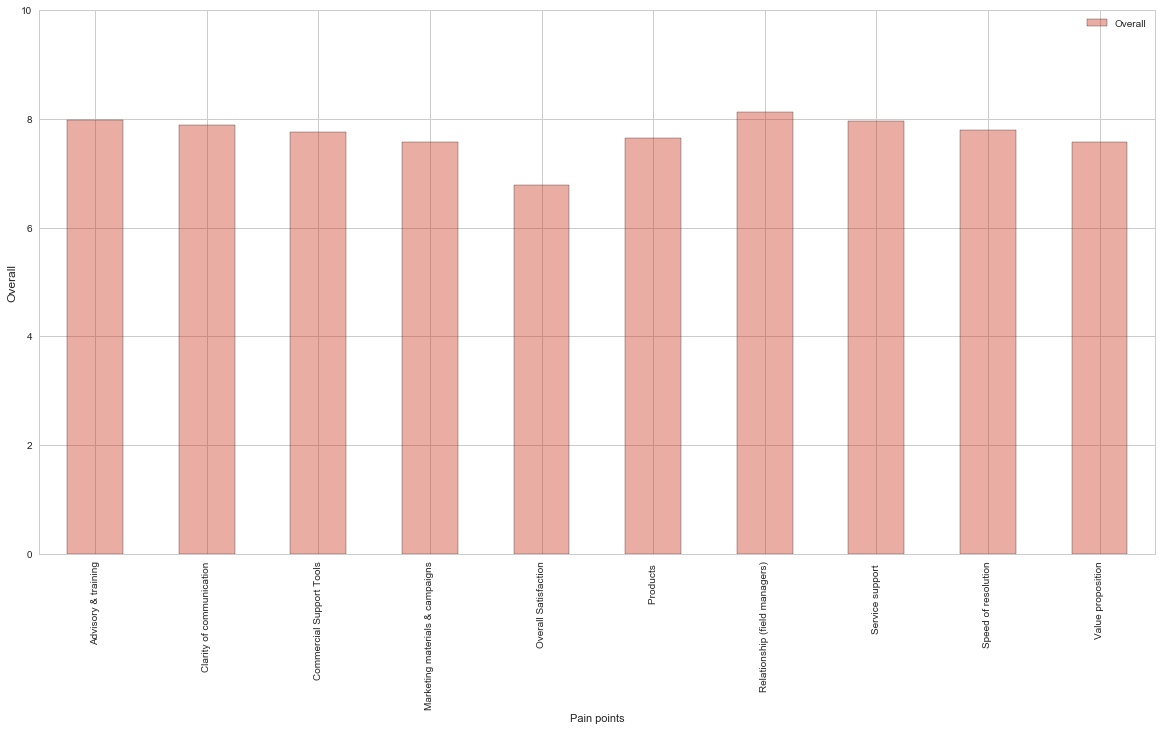

In [38]:
dfx = df2
dfx = dfx.groupby(['Pain points'])['Overall'].median()
%pylab inline
figsize(20,10)
dfx.plot.bar(color=(0.8, 0.2, 0.1, 0.4),  edgecolor='black', legend=True)
plt.ylabel("Overall", size = 12)
ylim(0,10)
plt.savefig("PainpointsOverall.png", dpi=400)

We observe that generally not much changes in the tendecies of the data between the pain points and the main categories, whereas the pain points give a more detailed view.

Populating the interactive namespace from numpy and matplotlib


(0, 10)

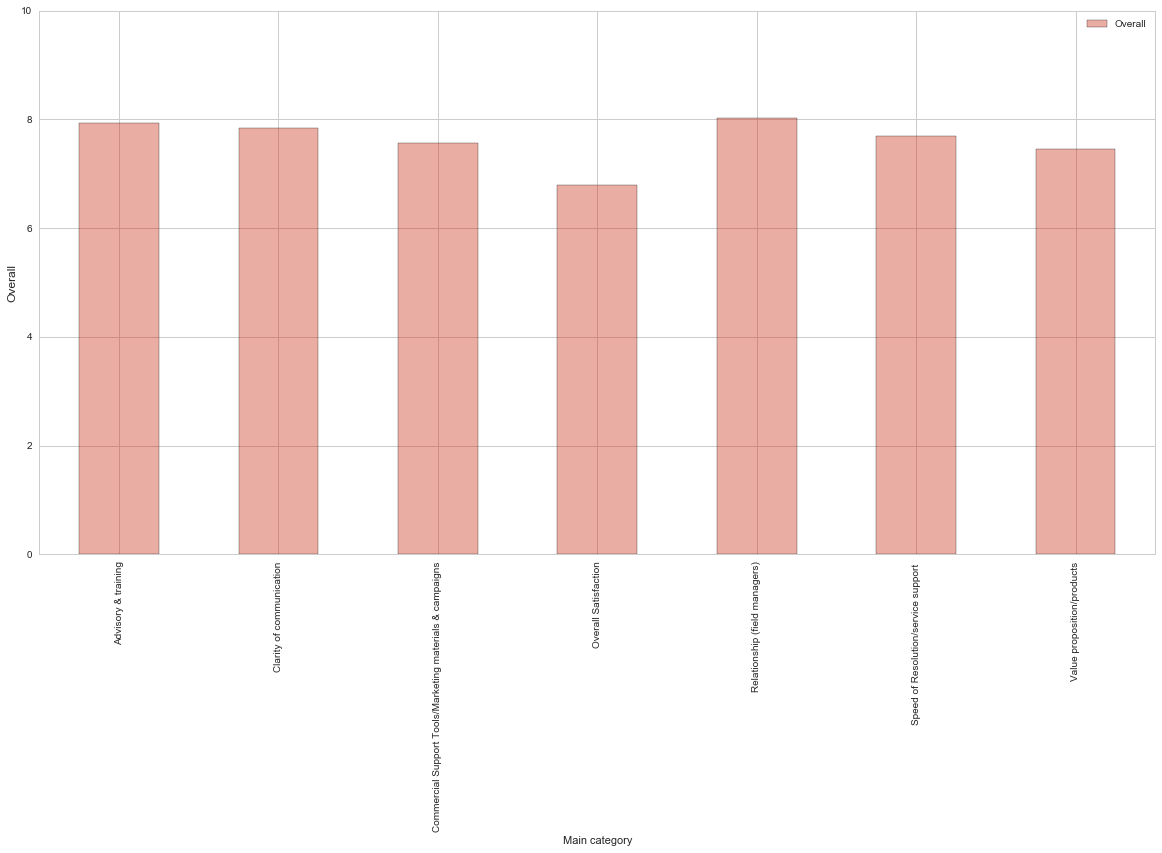

In [29]:
dfx = df2
dfx = dfx.groupby(['Main category'])['Overall'].mean()
%pylab inline
figsize(20,10)
dfx.plot.bar(color=(0.8, 0.2, 0.1, 0.4),  edgecolor='black', legend=True)
plt.ylabel("Overall", size = 12)
ylim(0,10)

Populating the interactive namespace from numpy and matplotlib


(0, 10)

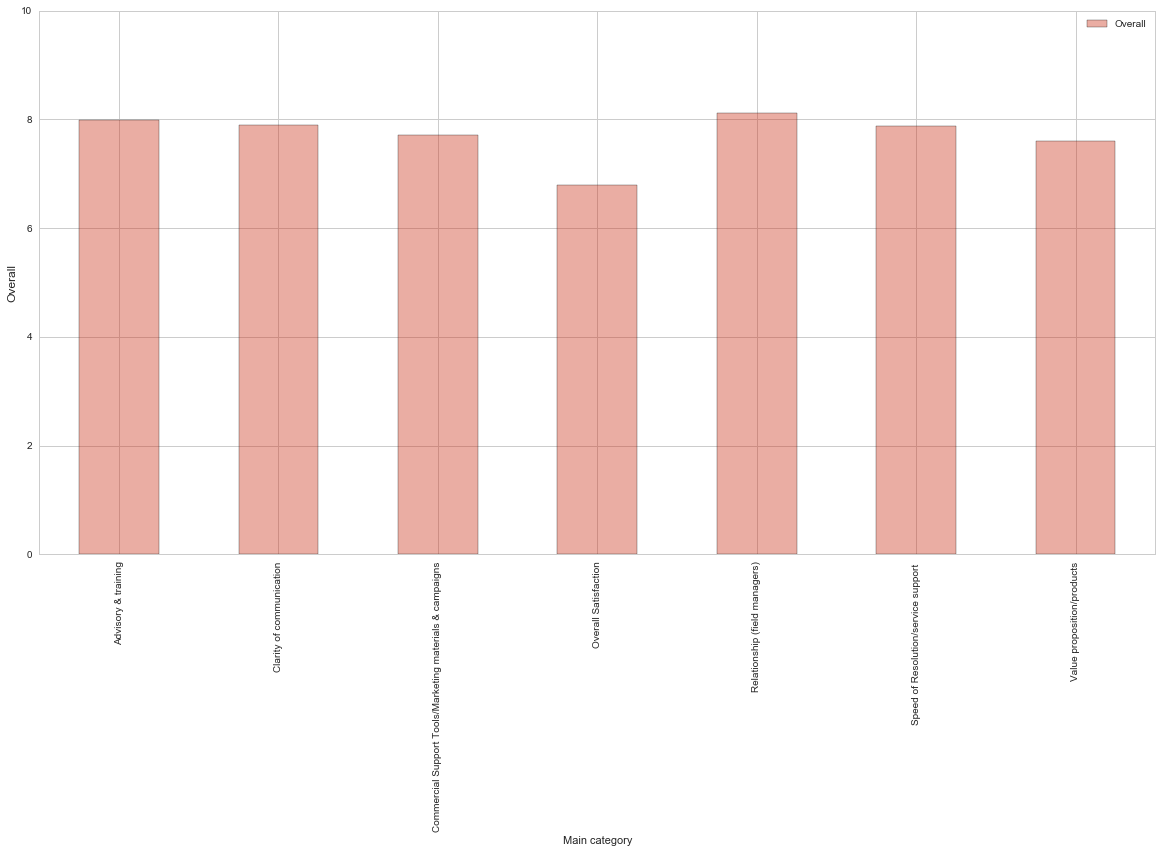

In [39]:
dfx = df2
dfx = dfx.groupby(['Main category'])['Overall'].median()
%pylab inline
figsize(20,10)
dfx.plot.bar(color=(0.8, 0.2, 0.1, 0.4),  edgecolor='black', legend=True)
plt.ylabel("Overall", size = 12)
ylim(0,10)

Moreover, our interest now consists in analyzing and better understanding how exactly the values in each categorical variable are behaving and whether or not we may detect numerous outliers. Firstly, we used a GroupBy-function with a specific threshold (set to 8 in the following case). We set our threshold to a specific number and convert every value in the column to 0 if its the specific value of a driver was lower than this threshold set, whereas we set it to 1 if its value is higher than the threshold. 

In [25]:
dfx = pd.read_csv('DriverAnalysisNT.csv')
#we convert now the values of every single driver to 0 and 1
dfx["Overall"] = dfx["Overall"].map(lambda s :1  if s >= 8 else 0)
dfxq = dfx.groupby(["Pain points", "Main category", "Overall"]).size()
dfxq 

Pain points                      Main category                                             Overall
Advisory & training              Advisory & training                                       0          21
                                                                                           1          21
Clarity of communication         Clarity of communication                                  0          26
                                                                                           1          21
Commercial Support Tools         Commercial Support Tools/Marketing materials & campaigns  0          29
                                                                                           1          13
Marketing materials & campaigns  Commercial Support Tools/Marketing materials & campaigns  0          12
                                                                                           1           6
Overall Satisfaction             Overall Satisfaction        

The preceding code is useful, however, it does not specify the percentages of the every single categorical variable, neither does it visualize them accordignly.
As for our next step we now are interested in the percentage changes of every main category and pain point, whereas we are using multiple thresholds now in this case.
To get clearer results, we now divide the analysis between Pain points and Main categories.

In [35]:
x = [6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5]
for i in x:
    dfx = pd.read_csv('DriverAnalysisNT.csv')
    dfx["Overall"] = dfx["Overall"].map(lambda s :1  if s >= i else 0)
    dfxq = dfx.groupby('Pain points')["Overall"].apply(lambda c: (c>0).sum()/len(c))
    print("The percentages of values of a Pain point above", i)
    print(dfxq) 
    figsize(20,10)

The percentages of values of a Pain point above 6
Pain points
Advisory & training                1.000000
Clarity of communication           1.000000
Commercial Support Tools           1.000000
Marketing materials & campaigns    0.944444
Overall Satisfaction               1.000000
Products                           0.925000
Relationship (field managers)      0.962963
Service support                    0.970149
Speed of resolution                0.901961
Value proposition                  0.901235
Name: Overall, dtype: float64
The percentages of values of a Pain point above 6.5
Pain points
Advisory & training                0.952381
Clarity of communication           0.936170
Commercial Support Tools           0.952381
Marketing materials & campaigns    0.777778
Overall Satisfaction               1.000000
Products                           0.875000
Relationship (field managers)      0.907407
Service support                    0.940299
Speed of resolution                0.843137
Value pr

We can detect a gradual decrease of values in percentage as the thresholds increase. The Overall Satisfaction pain point, however, contains only one value (6.787) and thus its percentage values falls drastically from 1.00 to 0.00 between the thresholds 6.5-7.

We now perform the same analysis for the main categories.

In [36]:
x = [6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5]
for i in x:
    dfx = pd.read_csv('DriverAnalysisNT.csv')
    dfx["Overall"] = dfx["Overall"].map(lambda s :1  if s >= i else 0)
    dfxq = dfx.groupby('Main category')["Overall"].apply(lambda c: (c>0).sum()/len(c))
    print("The percentages of values of a Main category above", i)
    print(dfxq) 
    figsize(20,10)

The percentages of values of a Main category above 6
Main category
Advisory & training                                         1.000000
Clarity of communication                                    1.000000
Commercial Support Tools/Marketing materials & campaigns    0.983333
Overall Satisfaction                                        1.000000
Relationship (field managers)                               0.962963
Speed of Resolution/service support                         0.940678
Value proposition/products                                  0.913043
Name: Overall, dtype: float64
The percentages of values of a Main category above 6.5
Main category
Advisory & training                                         0.952381
Clarity of communication                                    0.936170
Commercial Support Tools/Marketing materials & campaigns    0.900000
Overall Satisfaction                                        1.000000
Relationship (field managers)                               0.907407
Speed 

Our goal now is to visualize the previous findings into a multi-layered graph representing the percentages changes when introducing a higher treshhold.

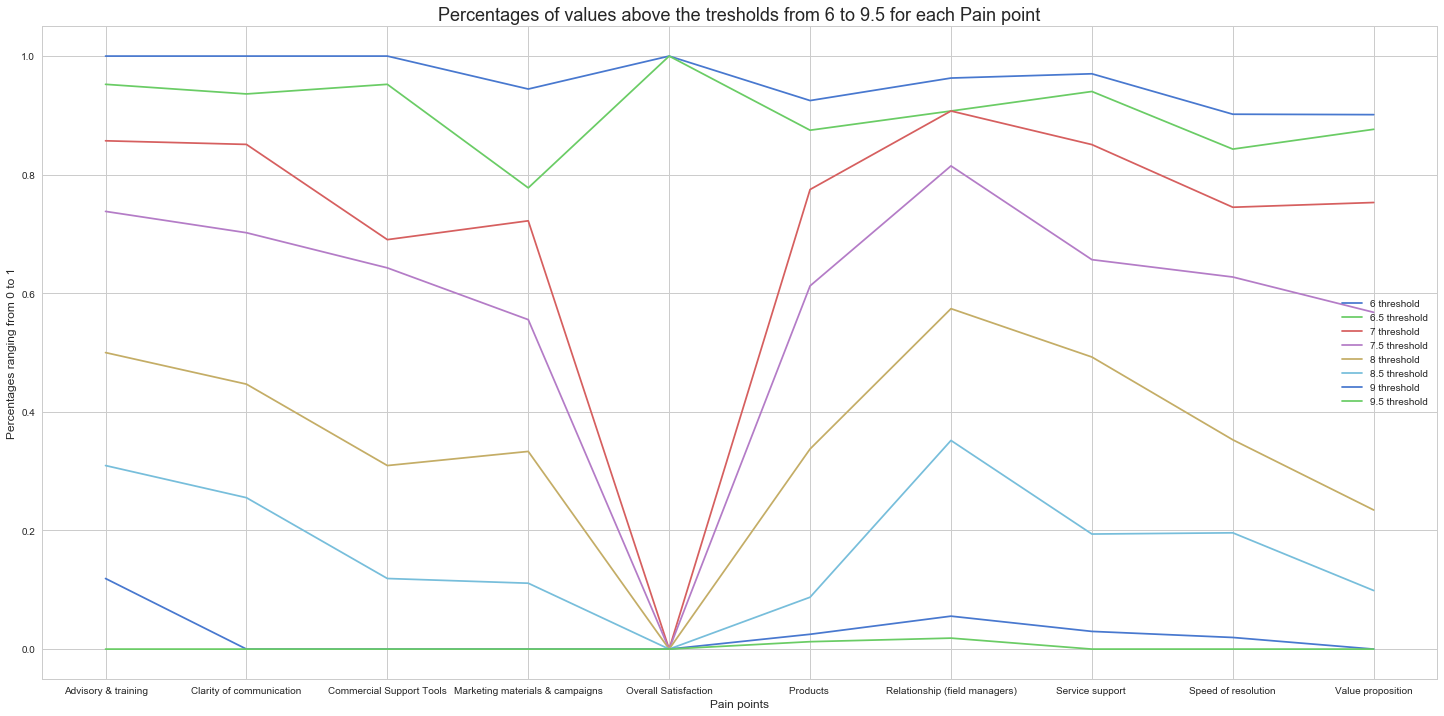

In [164]:
thresholds = [6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5]
for i in thresholds:
    dfx = pd.read_csv('DriverAnalysisNT.csv')
    dfx["Overall"] = dfx["Overall"].map(lambda s :1  if s >= i else 0)
    dfxq = dfx.groupby('Pain points')["Overall"].apply(lambda c: (c>0).sum()/len(c)) 
    figsize(25,12)
    plt.title("Percentages of values above the tresholds from 6 to 9.5 for each Pain point", size=18)
    plt.ylabel("Percentages ranging from 0 to 1", size=12)
    plt.xlabel("Pain points", size=12)
    plot(dfxq, label='%s threshold' % i)
    plt.legend()
    plt.savefig("PainpointsPercentages2.png", dpi=200)

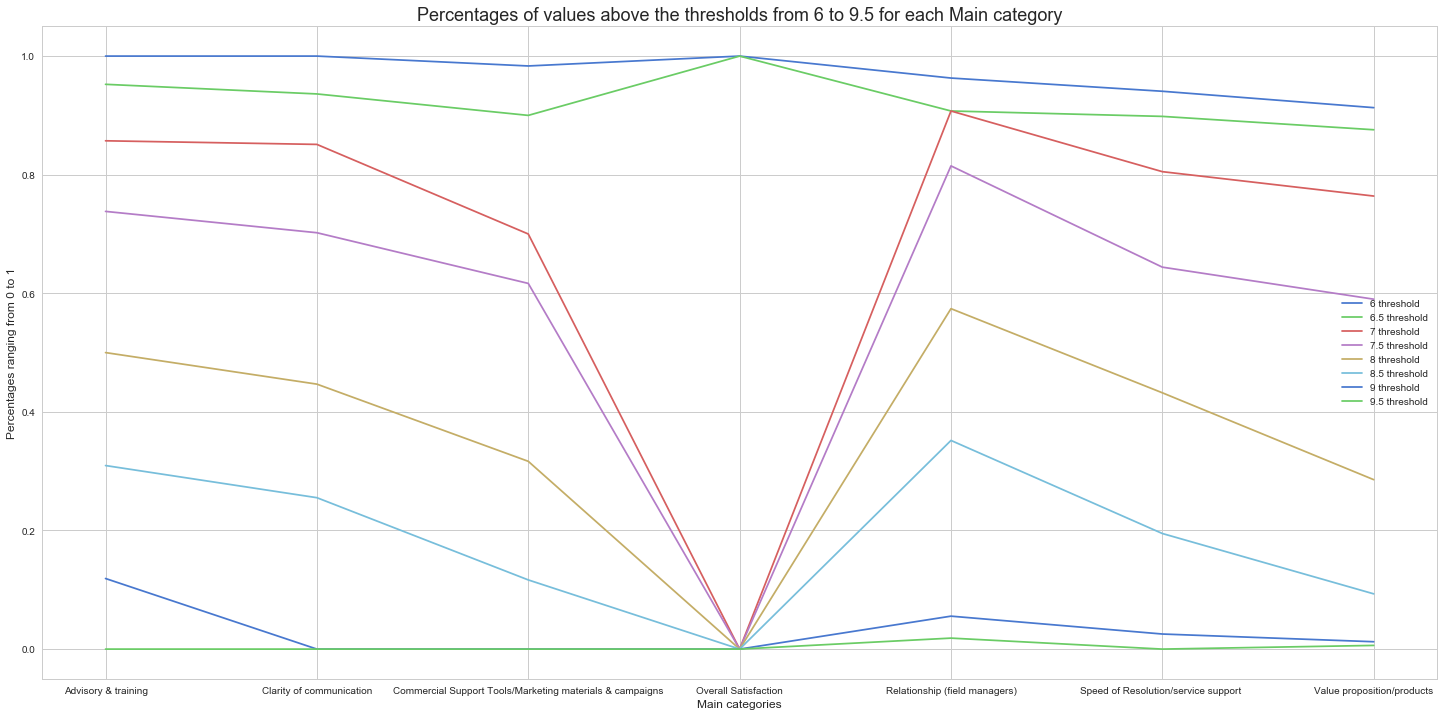

In [166]:
x = [6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5]
for i in x:
    dfx = pd.read_csv('DriverAnalysisNT.csv')
    dfx["Overall"] = dfx["Overall"].map(lambda s :1  if s >= i else 0)
    dfxq = dfx.groupby('Main category')["Overall"].apply(lambda c: (c>0).sum()/len(c))
    figsize(25,12)
    plt.title("Percentages of values above the thresholds from 6 to 9.5 for each Main category", size=18)
    plt.ylabel("Percentages ranging from 0 to 1", size=12)
    plt.xlabel("Main categories", size=12)
    plot(dfxq, label='%s threshold' % i)
    plt.legend(loc="right")
    plt.savefig("MainCategoriesPercentages2.png", dpi=200)

Interestingly enough, the overall satisfaction always scores the lowest, pointing towards a negative attitude of suvery tzkers, in regard to the higher values of the company in each other main category/pain point.

We now convert the different categorical variable into numerical ones.

In [ ]:
df_ = df2

In [165]:
def multiplelines(x):
    
#MainCategories    
    if x == 'Commercial Support Tools/Marketing materials & campaigns': #works
        x = 0
    elif x == 'Speed of Resolution/service support ':  #works
        x = 1
    elif x == 'Value proposition/products': #works
        x = 2
    elif x == 'Clarity of communication': #w
        x = 3
    elif x == 'Advisory & training':
        x = 4
    elif x == 'Relationship (field managers)':
        x = 5
    elif x == 'Overall Satisfaction':
        x = 9
        
    return x

In [166]:
def multiplelinesP(x):
#PainPoints
    if x == 'Marketing materials & campaigns': #works
        x = 0
    elif x == 'Speed of resolution': #works
        x = 1
    elif x == 'Service support ': #works
        x = 2
    elif x == 'Commercial Support Tools':  #works
        x = 3
    elif x == 'Value proposition': #works
        x = 4
    elif x == 'Products ': #works
        x = 5 
    elif x == 'Clarity of communication':  #works
        x = 6
    elif x == 'Advisory & training': #works
        x = 7  
    elif x == 'Relationship (field managers)': #works
        x = 8
    elif x == 'Overall Satisfaction':
        x = 9
    
    return x

In [167]:
df_['Main category'] = df_['Main category'].map(multiplelines)
df_['Pain points'] = df_['Pain points'].map(multiplelinesP)
df3 = df2


In [168]:
df_.head(50)

,Unnamed: 0,Pain points,Main category,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan.1,Feb.1,Mar.1,Apr.1,May.1,Jun.1,Jul.1,Aug.1,Sep.1,Oct.1,Nov.1,Dec.1,Jan.2,Feb.2,Mar.2,Apr.2,May.2,Jun.2,Jul.2,Aug.2,Sep.2,Oct.2,Nov.2,Dec.2,Jan.3,Feb.3,Mar.3,Apr.3,May.3,Jun.3,Jul.3,Aug.3,Sep.3,Oct.3,Nov.3,Overall,# Surveys,Weight
0,Overall Satisfaction,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.200000,6.250000,5.843750,6.210526,5.969697,5.863636,7.565217,6.359375,6.110092,6.202381,6.596330,6.420290,6.617021,6.556522,6.314815,6.435185,6.207547,7.087719,6.104478,6.539823,6.451852,6.825000,7.344156,6.838095,6.881356,6.947368,7.274074,7.159292,6.881356,6.829787,7.344444,6.885417,7.131579,7.193878,6.720000,7.424779,7.488095,7.552381,7.489583,6.681481,6.786698,164.255621,1114.753369
1,Ability to reach required service,1,1,5.214286,6.050000,6.047619,6.142857,NaN,6.163265,NaN,NaN,5.350877,8.000000,NaN,NaN,5.516854,4.823529,5.287671,5.275362,NaN,NaN,NaN,NaN,5.346154,NaN,NaN,5.287500,4.428571,4.709677,4.060606,5.161290,5.450000,6.428571,NaN,6.181818,6.333333,5.042553,NaN,5.800000,5.464286,6.025641,6.236842,6.238095,6.909091,6.111111,4.090909,6.171429,6.588235,6.347826,5.587786,9.202174,154.227180,861.788514
2,Ability to reach to regional sales team,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.074627,NaN,9.236364,8.853659,9.098039,NaN,NaN,NaN,NaN,NaN,NaN,8.034483,NaN,9.760000,9.791667,9.666667,9.448276,NaN,NaN,9.489362,NaN,NaN,9.800000,9.600000,NaN,8.694444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.202174,8.775599,62.933153,579.121820
3,Ability to resolve my issues,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.194030,NaN,8.909091,8.878049,8.788462,NaN,NaN,NaN,NaN,NaN,NaN,8.379310,NaN,9.280000,9.375000,9.333333,9.137931,NaN,NaN,8.891304,NaN,NaN,9.300000,8.700000,NaN,7.914286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.775599,5.179487,62.933153,552.276124
4,Accessibility to right person (Life),1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.900000,3.555556,NaN,5.833333,6.800000,NaN,5.179487,6.686141,28.352367,146.850723
5,Accessibility to right person (Non Life),1,1,NaN,NaN,NaN,NaN,6.428571,6.062500,7.136364,6.791667,6.526316,6.142857,7.642857,6.869565,7.230769,6.538462,6.937500,6.600000,7.083333,6.750000,6.866667,6.666667,6.307692,6.444444,7.153846,6.521739,6.727273,6.000000,6.892857,7.307692,7.833333,NaN,7.166667,7.285714,6.958333,6.176471,6.000000,6.357143,6.945946,5.666667,6.933333,6.718750,6.333333,6.642857,NaN,6.714286,6.625000,NaN,6.686141,6.391304,163.873957,1095.684432
6,Accident,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,5.000000,6.200000,6.953488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.391304,7.620362,22.771990,145.542721
7,Accidents,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.461538,7.616822,8.220430,7.470968,7.521739,6.333333,7.680000,7.401070,7.514706,7.620362,7.835833,59.495610,453.378111
8,Accounting Centres,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.333333,7.627907,7.475862,8.181818,7.722973,7.973154,7.769231,7.747748,7.949640,7.891156,7.709924,7.828571,8.430851,7.923567,7.974522,7.333333,7.823529,7.534031,7.896296,7.835833,8.369681,106.221813,832.336425
9,Activity of sales support experts,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.666667,8.187500,7.782609,NaN,NaN,NaN,NaN,NaN,8.485714,9.000000,8.000000,NaN,8.426471,8.727273,NaN,8.187500,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.369681,7.838384,22.352535,187.083580


In [79]:
df2.head(500)

,Unnamed: 0,Pain points,Main category,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan.1,Feb.1,Mar.1,Apr.1,May.1,Jun.1,Jul.1,Aug.1,Sep.1,Oct.1,Nov.1,Dec.1,Jan.2,Feb.2,Mar.2,Apr.2,May.2,Jun.2,Jul.2,Aug.2,Sep.2,Oct.2,Nov.2,Dec.2,Jan.3,Feb.3,Mar.3,Apr.3,May.3,Jun.3,Jul.3,Aug.3,Sep.3,Oct.3,Nov.3,Overall,# Surveys,Weight
0,Overall Satisfaction,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.200000,6.250000,5.843750,6.210526,5.969697,5.863636,7.565217,6.359375,6.110092,6.202381,6.596330,6.420290,6.617021,6.556522,6.314815,6.435185,6.207547,7.087719,6.104478,6.539823,6.451852,6.825000,7.344156,6.838095,6.881356,6.947368,7.274074,7.159292,6.881356,6.829787,7.344444,6.885417,7.131579,7.193878,6.720000,7.424779,7.488095,7.552381,7.489583,6.681481,6.786698,164.255621,1114.753369
1,Ability to reach required service,1,1,5.214286,6.050000,6.047619,6.142857,NaN,6.163265,NaN,NaN,5.350877,8.000000,NaN,NaN,5.516854,4.823529,5.287671,5.275362,NaN,NaN,NaN,NaN,5.346154,NaN,NaN,5.287500,4.428571,4.709677,4.060606,5.161290,5.450000,6.428571,NaN,6.181818,6.333333,5.042553,NaN,5.800000,5.464286,6.025641,6.236842,6.238095,6.909091,6.111111,4.090909,6.171429,6.588235,6.347826,5.587786,9.202174,154.227180,861.788514
2,Ability to reach to regional sales team,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.074627,NaN,9.236364,8.853659,9.098039,NaN,NaN,NaN,NaN,NaN,NaN,8.034483,NaN,9.760000,9.791667,9.666667,9.448276,NaN,NaN,9.489362,NaN,NaN,9.800000,9.600000,NaN,8.694444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.202174,8.775599,62.933153,579.121820
3,Ability to resolve my issues,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.194030,NaN,8.909091,8.878049,8.788462,NaN,NaN,NaN,NaN,NaN,NaN,8.379310,NaN,9.280000,9.375000,9.333333,9.137931,NaN,NaN,8.891304,NaN,NaN,9.300000,8.700000,NaN,7.914286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.775599,5.179487,62.933153,552.276124
4,Accessibility to right person (Life),1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.900000,3.555556,NaN,5.833333,6.800000,NaN,5.179487,6.686141,28.352367,146.850723
5,Accessibility to right person (Non Life),1,1,NaN,NaN,NaN,NaN,6.428571,6.062500,7.136364,6.791667,6.526316,6.142857,7.642857,6.869565,7.230769,6.538462,6.937500,6.600000,7.083333,6.750000,6.866667,6.666667,6.307692,6.444444,7.153846,6.521739,6.727273,6.000000,6.892857,7.307692,7.833333,NaN,7.166667,7.285714,6.958333,6.176471,6.000000,6.357143,6.945946,5.666667,6.933333,6.718750,6.333333,6.642857,NaN,6.714286,6.625000,NaN,6.686141,6.391304,163.873957,1095.684432
6,Accident,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,5.000000,6.200000,6.953488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.391304,7.620362,22.771990,145.542721
7,Accidents,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.461538,7.616822,8.220430,7.470968,7.521739,6.333333,7.680000,7.401070,7.514706,7.620362,7.835833,59.495610,453.378111
8,Accounting Centres,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.333333,7.627907,7.475862,8.181818,7.722973,7.973154,7.769231,7.747748,7.949640,7.891156,7.709924,7.828571,8.430851,7.923567,7.974522,7.333333,7.823529,7.534031,7.896296,7.835833,8.369681,106.221813,832.336425
9,Activity of sales support experts,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.666667,8.187500,7.782609,NaN,NaN,NaN,NaN,NaN,8.485714,9.000000,8.000000,NaN,8.426471,8.727273,NaN,8.187500,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.369681,7.838384,22.352535,187.083580


We now delete assign these specific columns to their own variable.

In [66]:
Painpoints = df2['Pain points']
Maincategories = df2['Main category']
Surveys = df2['# Surveys']
Weight = df2['Weight']
Overall = df2['Overall']

In [16]:
columns = []
for i in df2['Unnamed: 0']:
    columns.append(i)
print(columns)

['Overall Satisfaction', 'Ability to reach required service', 'Ability to reach to regional sales team', 'Ability to resolve my issues', 'Accessibility to right person (Life)', 'Accessibility to right person (Non Life)', 'Accident', 'Accidents', 'Accounting Centres', 'Activity of sales support experts', 'Additional coverage', 'Additional coverage sat', 'Administration efficiency of Relationship Managers', 'Administration efficiency of Sales Support Team', 'App Calculations', 'App Ease', 'App Support', 'App Support Presentation', 'Are you happy with the training opportunities that you receive from Generali?', 'Availability (Account Management)', 'Availability of inspector', 'Availability of Partner Portal', 'Availability of your main contact', 'Availability of your main contact', 'Availability of your main contact', 'Awareness of news, campaigns, innovations and changes', 'Branch - Availability', 'Branch - Manager', 'Branch - Ops Execs', 'Branch - Support', 'Branch assignment', 'Busines

We now delete all not directly survey related columns, as we now analyze the specific values of the surveys.

In [45]:
del df2['Pain points']
del df2['Main category']
del df2['# Surveys']
del df2['Weight']
del df2['Overall']
del df2['Unnamed: 0']

In [51]:
df2.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan.1,Feb.1,Mar.1,Apr.1,May.1,Jun.1,Jul.1,Aug.1,Sep.1,Oct.1,Nov.1,Dec.1,Jan.2,Feb.2,Mar.2,Apr.2,May.2,Jun.2,Jul.2,Aug.2,Sep.2,Oct.2,Nov.2,Dec.2,Jan.3,Feb.3,Mar.3,Apr.3,May.3,Jun.3,Jul.3,Aug.3,Sep.3,Oct.3,Nov.3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2,6.250000,5.843750,6.210526,5.969697,5.863636,7.565217,6.359375,6.110092,6.202381,6.59633,6.42029,6.617021,6.556522,6.314815,6.435185,6.207547,7.087719,6.104478,6.539823,6.451852,6.825000,7.344156,6.838095,6.881356,6.947368,7.274074,7.159292,6.881356,6.829787,7.344444,6.885417,7.131579,7.193878,6.720000,7.424779,7.488095,7.552381,7.489583,6.681481
1,5.214286,6.05,6.047619,6.142857,NaN,6.163265,NaN,NaN,5.350877,8.000000,NaN,NaN,5.516854,4.823529,5.287671,5.275362,NaN,NaN,NaN,NaN,5.346154,NaN,NaN,5.287500,4.428571,4.709677,4.060606,5.161290,5.450000,6.428571,NaN,6.181818,6.333333,5.042553,NaN,5.800000,5.464286,6.025641,6.236842,6.238095,6.909091,6.111111,4.090909,6.171429,6.588235,6.347826,5.587786
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.074627,NaN,9.236364,8.853659,9.098039,NaN,NaN,NaN,NaN,NaN,NaN,8.034483,NaN,9.760000,9.791667,9.666667,9.448276,NaN,NaN,9.489362,NaN,NaN,9.800000,9.600000,NaN,8.694444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.202174
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.194030,NaN,8.909091,8.878049,8.788462,NaN,NaN,NaN,NaN,NaN,NaN,8.379310,NaN,9.280000,9.375000,9.333333,9.137931,NaN,NaN,8.891304,NaN,NaN,9.300000,8.700000,NaN,7.914286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.775599
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.900000,3.555556,NaN,5.833333,6.800000,NaN,5.179487


Now we are interested in plotting the changes in values in general of all survey-votes received, based on their date and try to map out where this trend is currently going. We perform this in both the cases of the mean and the median.

Populating the interactive namespace from numpy and matplotlib


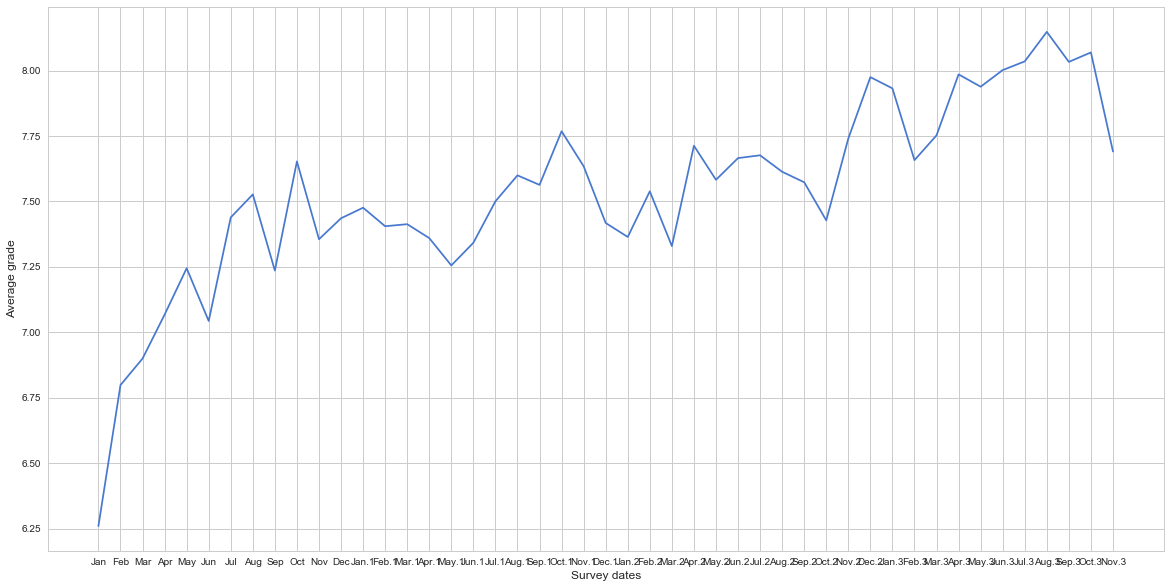

In [46]:
y = df2.mean()
%pylab inline
figsize(20,10)
#ax = subplot(111)
plt.xlabel("Survey dates", size = 12)
plt.ylabel("Average grade", size = 12)
plt.plot(y)
plt.show()

We may note that there has been a distinct increase in values over the duration of these surveys. Notably, even though the average Overall satisfaction score is lower than 7, we can detect in the two graphs that the average and medians of all the single values have not been lower than this threshold since the July of the first year (40 months ago as of November 2018).

Populating the interactive namespace from numpy and matplotlib


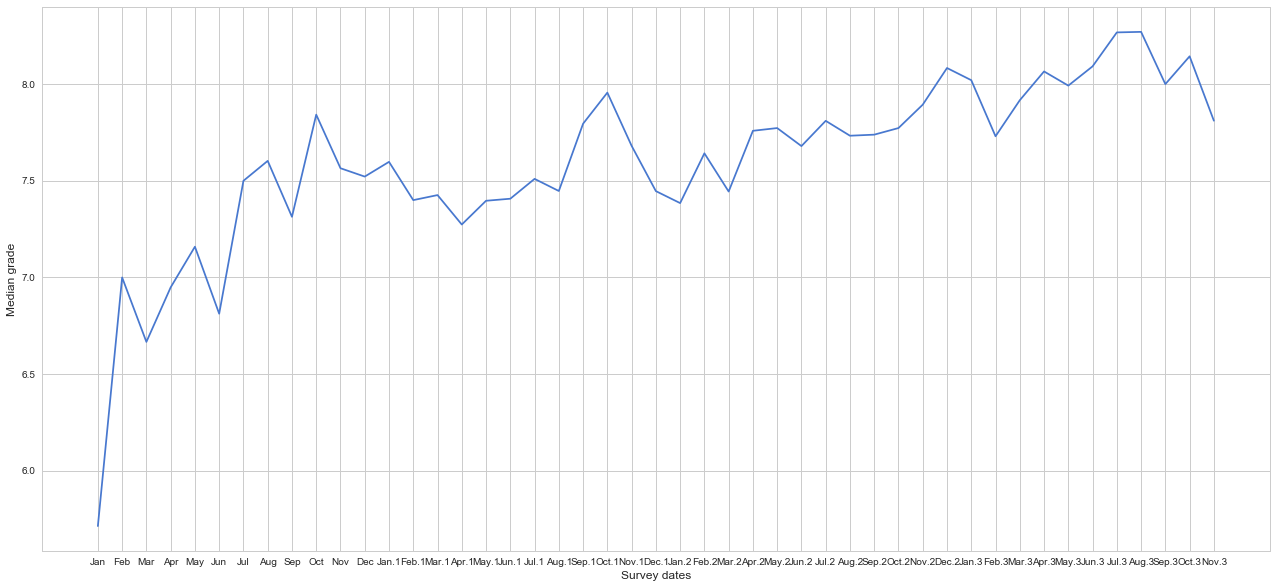

In [47]:
y = df2.median()
%pylab inline
figsize(22,10)
#ax = subplot(111)
plt.xlabel("Survey dates", size = 12)
plt.ylabel("Median grade", size = 12)
plt.plot(y)
plt.show()

Only really small differences may be detected between the mean and the median, whereas the increasing trend is clear.

In conclusion, over the period of time the values have, in general, been nearly strictly increasing, whereas our two categorical columns have given us the ability to inspect more thoroughly the patterns of the data.